In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler


# Phase 1: Data Collection 

pd.set_option("expand_frame_repr", False)
df= pd.read_csv('C:/Users/Student/OneDrive - University of KwaZulu-Natal/Desktop/INF791 Assign1 24804500/combined_dataset.csv')
df2 = pd.DataFrame(df)
df2.columns = ['Nickname', 'Defender Score', 'Attacker Score', 'Time (sec)', 'Winner', 'Level']
df2

,Nickname,Defender Score,Attacker Score,Time (sec),Winner,Level
0,u20444550,8,5,138,Defender,Expert
1,u20444550,8,5,137,Defender,Expert
2,u20444550,10,3,118,Defender,Expert
3,u20444550,8,5,112,Defender,Expert
4,u20444550,9,4,107,Defender,Expert
...,...,...,...,...,...,...
5839,Vader,5,8,303,Attacker,Beginner
5840,Sith,7,6,288,Defender,Beginner
5841,Lulamela,5,8,287,Attacker,Beginner
5842,Lu,6,7,283,Attacker,Beginner


In [4]:
# Data cleaning
# 1. Convert 'Time (sec)' to numeric, handling non-numeric values
df['Time (sec)'] = pd.to_numeric(df['Time (sec)'], errors='coerce')

# 2. Ensure 'Winner' column only contains 'Defender', 'Attacker', 'Draw'
# and fill missing values with 'Unknown'
df['Winner'] = df['Winner'].map({'Defender': 'Defender', 'Attacker': 'Attacker', 'Draw': 'Draw'})
df['Winner'] = df['Winner'].fillna('Unknown')

# 3. Ensure 'Level' column only contains 'Beginner', 'Intermediate', 'Expert'
# and fill missing values with 'Unknown'
df['Level'] = df['Level'].map({'Beginner': 'Beginner', 'Intermediate': 'Intermediate', 'Expert': 'Expert'})
df['Level'] = df['Level'].fillna('Unknown')

# Print the modified DataFrame
df 

,Nickname,Defender Score,Attacker Score,Time (sec),Winner,Level
0,u20444550,8,5,138,Defender,Expert
1,u20444550,8,5,137,Defender,Expert
2,u20444550,10,3,118,Defender,Expert
3,u20444550,8,5,112,Defender,Expert
4,u20444550,9,4,107,Defender,Expert
...,...,...,...,...,...,...
5839,Vader,5,8,303,Attacker,Beginner
5840,Sith,7,6,288,Defender,Beginner
5841,Lulamela,5,8,287,Attacker,Beginner
5842,Lu,6,7,283,Attacker,Beginner


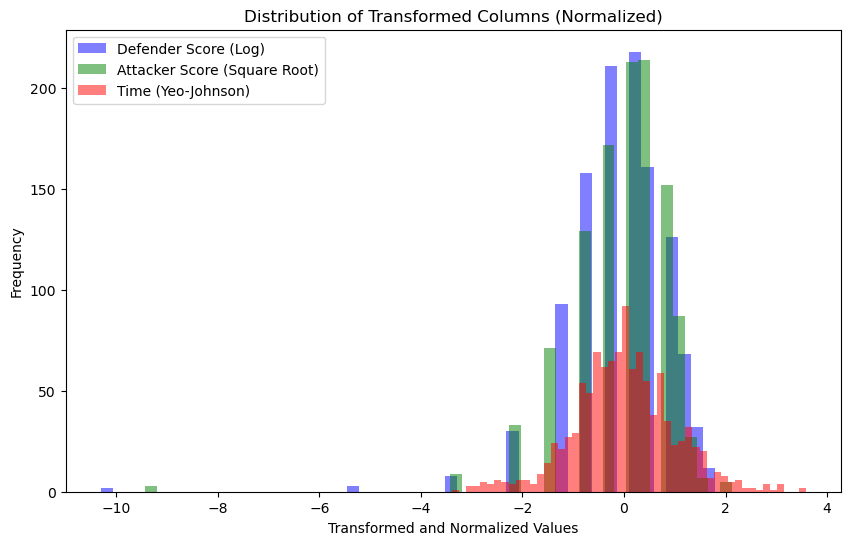

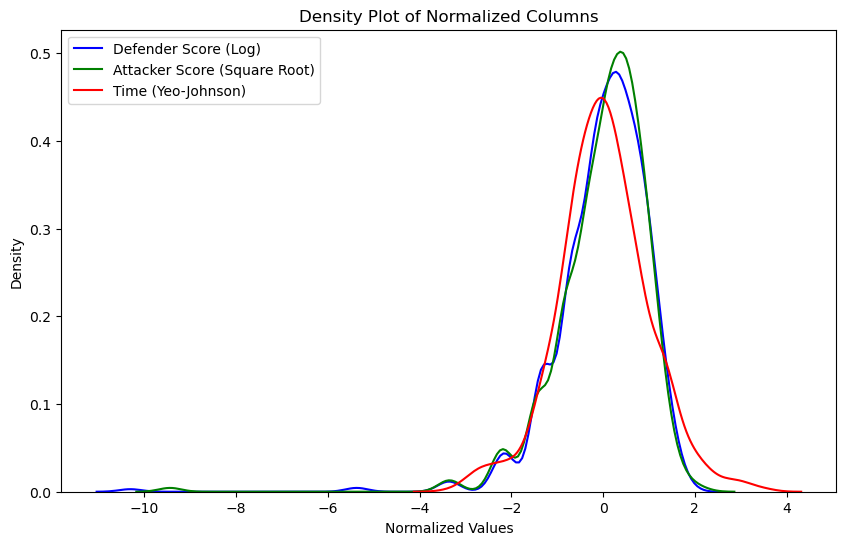

In [8]:
# --- Drop all duplicate rows ---
df2 = df2.drop_duplicates()

# --- Remove negative values from time/timestamp feature ---
# Adjusting the 'Time (sec)' column by adding 11 to each value
df2['Time (sec)'] = df2['Time (sec)'] + 11

# --- Log transformation applied to the 'Defender Score' ---
# Applying log transformation to reduce skewness
df2['Defender Score'] = np.log(df2['Defender Score'] + 1)

# --- Square root transformation applied to 'Attacker Score' ---
# Applying square root transformation
df2['Attacker Score'] = np.sqrt(df2['Attacker Score'])

# --- Yeo Johnson transformation applied to 'Time (sec)' ---
# Applying Yeo-Johnson transformation to the 'Time (sec)' column
df2['Time (sec)'], _ = stats.yeojohnson(df2['Time (sec)'])

# --- Normalize transformed columns ---
scaler = StandardScaler()
df2_normalized = df2.copy()
df2_normalized[['Defender Score', 'Attacker Score', 'Time (sec)']] = scaler.fit_transform(
    df2[['Defender Score', 'Attacker Score', 'Time (sec)']]
)

# --- Plot normalized histograms combined in one plot ---
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the normalized 'Defender Score' column
ax.hist(df2_normalized['Defender Score'], bins=50, alpha=0.5, color='blue', label='Defender Score (Log)')

# Plot the normalized 'Attacker Score' column
ax.hist(df2_normalized['Attacker Score'], bins=50, alpha=0.5, color='green', label='Attacker Score (Square Root)')

# Plot the normalized 'Time (sec)' column
ax.hist(df2_normalized['Time (sec)'], bins=50, alpha=0.5, color='red', label='Time (Yeo-Johnson)')

# Add labels and a legend
ax.set_xlabel('Transformed and Normalized Values')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Transformed Columns (Normalized)')
ax.legend()

# Show the plot
plt.show()

# --- Plot the density of normalized columns ---
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the density of the normalized 'Defender Score' column
sns.kdeplot(df2_normalized['Defender Score'], color='blue', label='Defender Score (Log)', ax=ax)

# Plot the density of the normalized 'Attacker Score' column
sns.kdeplot(df2_normalized['Attacker Score'], color='green', label='Attacker Score (Square Root)', ax=ax)

# Plot the density of the normalized 'Time (sec)' column
sns.kdeplot(df2_normalized['Time (sec)'], color='red', label='Time (Yeo-Johnson)', ax=ax)

# Add labels and a legend
ax.set_xlabel('Normalized Values')
ax.set_ylabel('Density')
ax.set_title('Density Plot of Normalized Columns')
ax.legend()

# Show the density plot
plt.show()


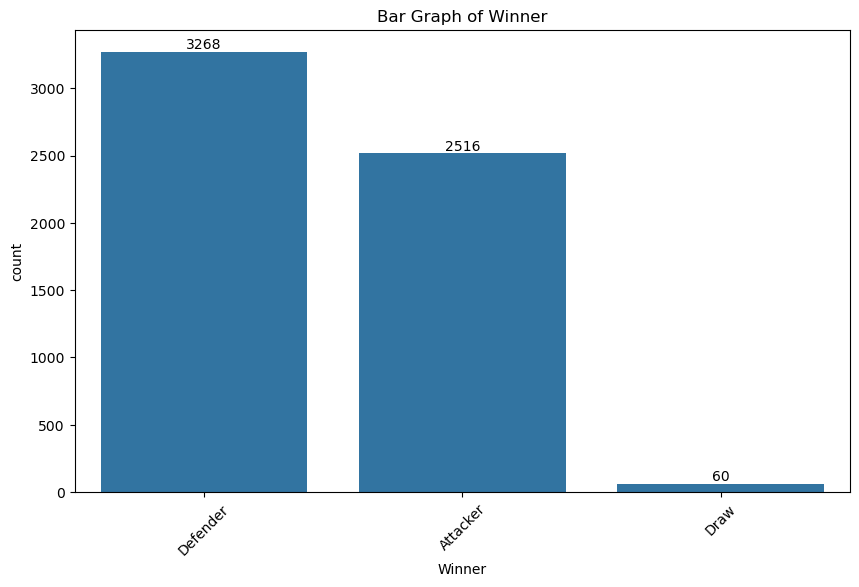

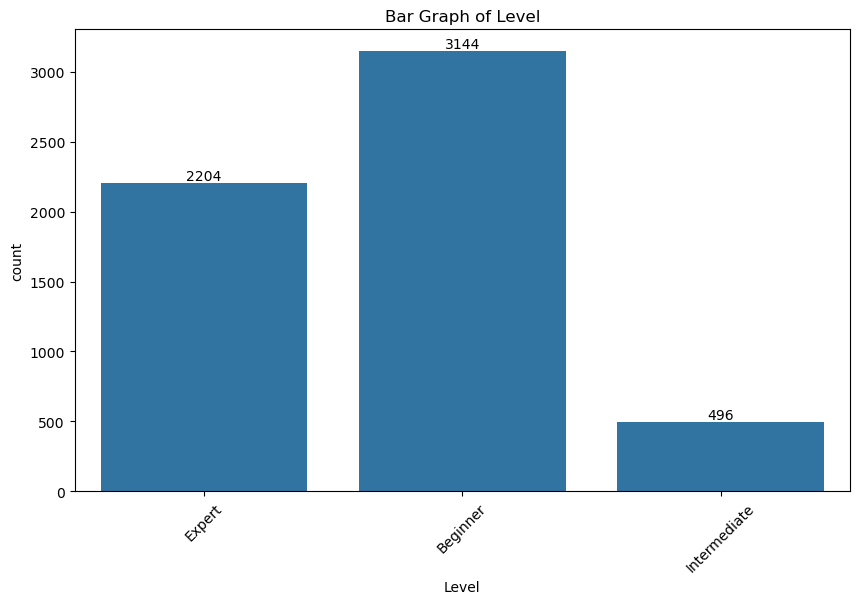

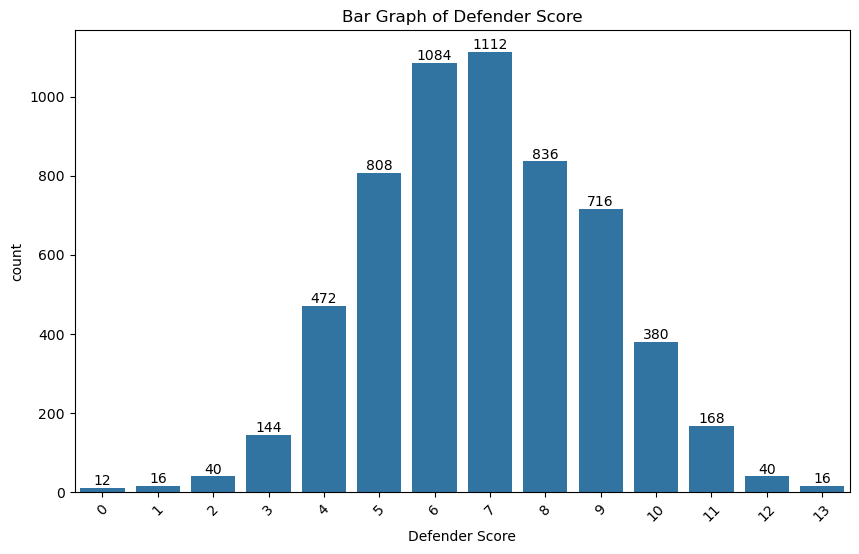

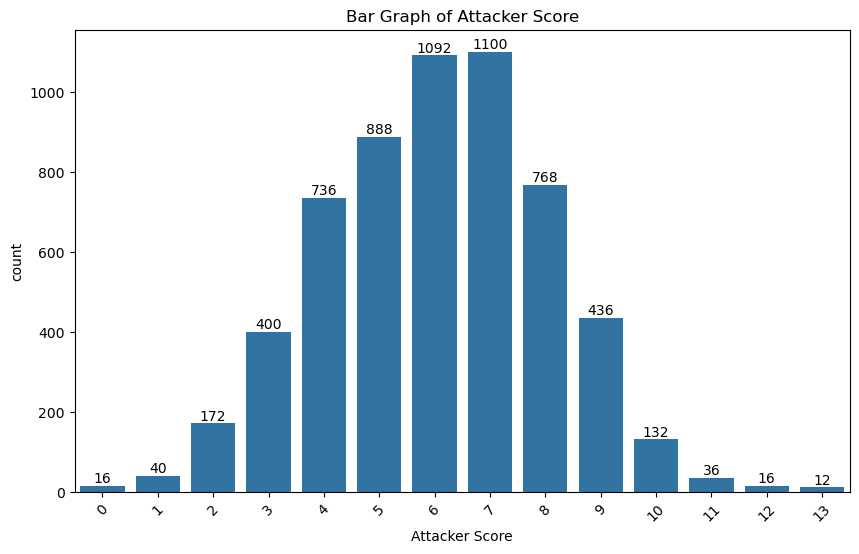

In [10]:
# Function to create a count plot for a given feature
def plot_count(feature):
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=feature, data=df)
    plt.title(f'Bar Graph of {feature}')
    plt.xticks(rotation=45)
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', 
                    xytext=(0, 5), textcoords='offset points')
    plt.show()

# List of relevant features from your dataset
features = ['Winner', 'Level', 'Defender Score', 'Attacker Score']

# Iterate over each feature and plot if it exists in the DataFrame
for feature in features:
    if feature in df.columns:
        plot_count(feature)
    else:
        print(f"Column '{feature}' not found in the DataFrame.")




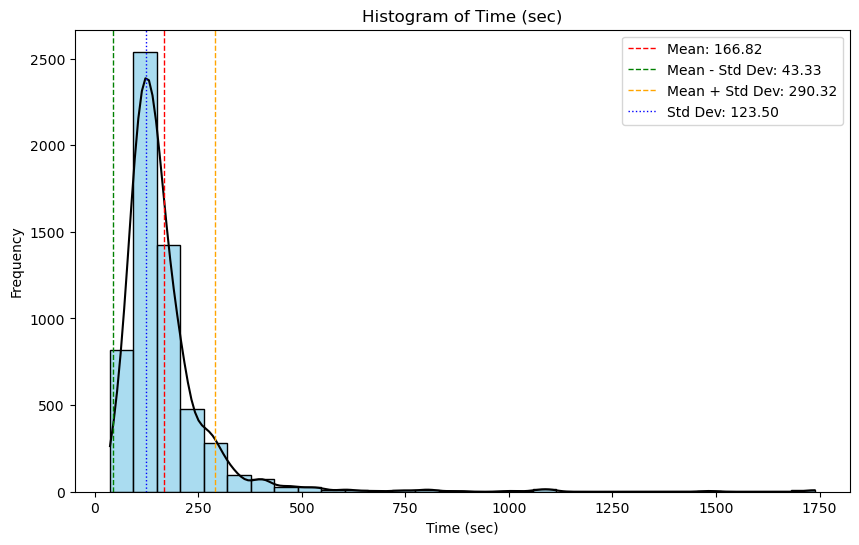

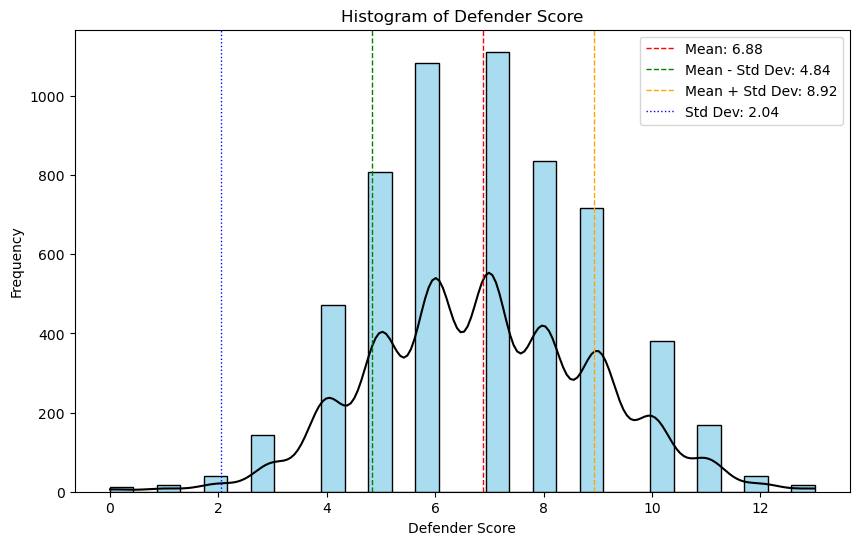

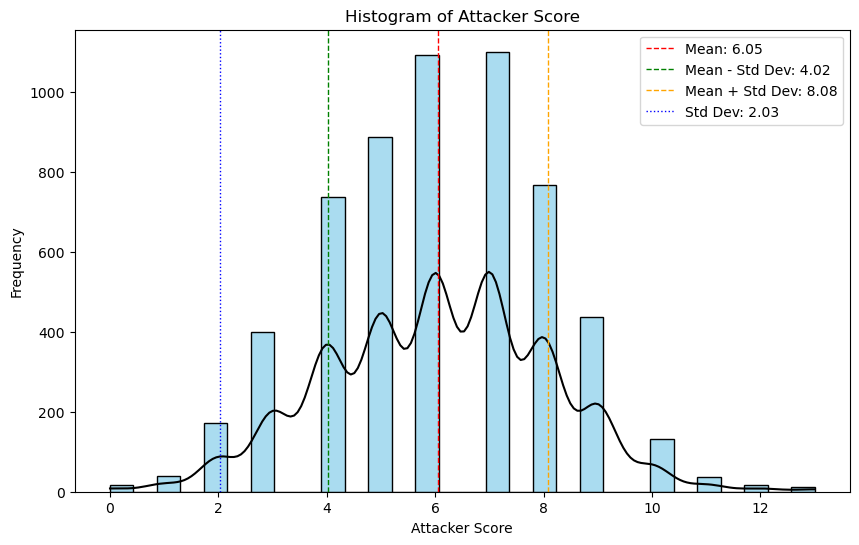

In [12]:
# --- Numeric visualizations (count, mean, and standard deviation) --- #

# Function to plot histogram with mean and standard deviation
def plot_histogram(feature):
    data = df[feature]
    mean = np.mean(data)
    std_dev = np.std(data)

    plt.figure(figsize=(10, 6))
    ax = sns.histplot(data, bins=30, kde=True, color='skyblue', edgecolor='black', alpha=0.7)
    ax.lines[0].set_color('black')

    plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean:.2f}')
    plt.axvline(mean - std_dev, color='green', linestyle='dashed', linewidth=1, label=f'Mean - Std Dev: {mean - std_dev:.2f}')
    plt.axvline(mean + std_dev, color='orange', linestyle='dashed', linewidth=1, label=f'Mean + Std Dev: {mean + std_dev:.2f}')
    plt.axvline(std_dev, color='blue', linestyle='dotted', linewidth=1, label=f'Std Dev: {std_dev:.2f}')

    plt.legend(loc='upper right')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Features from your dataset
numeric_features = ['Time (sec)', 'Defender Score', 'Attacker Score']

# Iterate over each numeric feature and plot
for feature in numeric_features:
    plot_histogram(feature)


In [16]:
from sklearn import preprocessing

lab_encoder = preprocessing.LabelEncoder()
# Encode 'Nickname' column
df2['Nickname'] = lab_encoder.fit_transform(df2['Nickname'])

# Encode 'Winner' column
df2['Winner'] = lab_encoder.fit_transform(df2['Winner'])

# Encode 'Level' column
df2['Level'] = lab_encoder.fit_transform(df2['Level'])

df2


,Nickname,Defender Score,Attacker Score,Time (sec),Winner,Level
0,482,8,5,138,1,1
1,482,8,5,137,1,1
2,482,10,3,118,1,1
3,482,8,5,112,1,1
4,482,9,4,107,1,1
...,...,...,...,...,...,...
5839,341,5,8,303,0,0
5840,297,7,6,288,1,0
5841,164,5,8,287,0,0
5842,161,6,7,283,0,0


In [18]:
from sklearn.model_selection import train_test_split  # Import the train_test_split function

# Select features (X) and target variable (y)
X = df2[['Defender Score', 'Attacker Score', 'Time (sec)', 'Level']]  # Features
y = df2['Winner']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Displaying the split data
print("X_train sample:")
print(X_train.head())  # Show the first 5 rows of the training feature set

print("\nX_test sample:")
print(X_test.head())  # Show the first 5 rows of the testing feature set

print("\ny_train sample:")
print(y_train.head())  # Show the first 5 rows of the training target set

print("\ny_test sample:")
print(y_test.head())  # Show the first 5 rows of the testing target set


X_train sample:
      Defender Score  Attacker Score  Time (sec)  Level
1643               6               7         122      0
2789               6               7         111      0
3667               5               8         165      0
3880               9               4          73      1
4235              12               1         108      1

X_test sample:
      Defender Score  Attacker Score  Time (sec)  Level
2900               5               7         146      0
351                9               4         146      1
994               11               2         108      1
3612               7               6         202      0
2763               7               6         273      0

y_train sample:
1643    0
2789    0
3667    0
3880    1
4235    1
Name: Winner, dtype: int32

y_test sample:
2900    0
351     1
994     1
3612    1
2763    1
Name: Winner, dtype: int32


In [20]:
#The %%time command is typically used in Jupyter Notebook environments, such as Jupyter Notebook or JupyterLab. 
#It is called a "magic command" and is used to measure the execution time of a specific code cell. 
#When you include %%time at the beginning of a cell, it tells Jupyter to measure the time it takes to run the code within 
#that cell
#%%time


# Import various libraries and tools for building and evaluating machine learning models in Python
# Imported models: ensemble, random forest, SVM, Naive Bayes, genetic algorithm
# Imported evaluation metrics: accuracy, precision, recall, f1 score

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

from sklearn.ensemble import StackingClassifier #ensmbl method of stacking classify for ensmbling
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 


from sklearn.tree import DecisionTreeClassifier   #estimator in GA
import numpy as np

import warnings
warnings.filterwarnings('ignore') 

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the Random Forest Classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf.fit(X_train, y_train)

# Predict the target labels for the test data
rf_pred = rf.predict(X_test)

# Calculate the accuracy, classification report, and confusion matrix
rf_accuracy = accuracy_score(y_test, rf_pred)  # Compare predicted labels (rf_pred) to actual test labels (y_test)
rf_report = classification_report(y_test, rf_pred, target_names=["Attacker", "Defender", "Draw"])  # Provide class names
rf_matrix = confusion_matrix(y_test, rf_pred)  # Generate confusion matrix

# Print out the accuracy, classification report, and confusion matrix
print('Accuracy of Random Forest : ', round(rf_accuracy, 3))
print('Classification report of Random Forest : \n', rf_report)
print('Confusion Matrix of Random Forest : \n', rf_matrix)



Accuracy of Random Forest :  1.0
Classification report of Random Forest : 
               precision    recall  f1-score   support

    Attacker       1.00      1.00      1.00       503
    Defender       1.00      1.00      1.00       657
        Draw       1.00      1.00      1.00         9

    accuracy                           1.00      1169
   macro avg       1.00      1.00      1.00      1169
weighted avg       1.00      1.00      1.00      1169

Confusion Matrix of Random Forest : 
 [[503   0   0]
 [  0 657   0]
 [  0   0   9]]


In [26]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the Linear Support Vector Classifier (SVC)
svr = LinearSVC()

# Train the Linear SVC model on the training dataset
svr.fit(X_train, y_train)

# Make predictions on the test set
svr_pred = svr.predict(X_test)

# Calculate evaluation metrics for SVM
svr_accuracy = accuracy_score(y_test, svr_pred)  # Compare actual vs predicted labels
svr_report = classification_report(y_test, svr_pred, target_names=["Attacker", "Defender", "Draw"])  # Classification report with target names
svr_matrix = confusion_matrix(y_test, svr_pred)  # Confusion matrix

# Print the evaluation results
print('Accuracy of SVM: ', round(svr_accuracy, 3))
print('Classification Report of SVM:\n', svr_report)
print('Confusion Matrix of SVM:\n', svr_matrix)


Accuracy of SVM:  0.99
Classification Report of SVM:
               precision    recall  f1-score   support

    Attacker       0.99      0.99      0.99       503
    Defender       0.99      1.00      0.99       657
        Draw       0.00      0.00      0.00         9

    accuracy                           0.99      1169
   macro avg       0.66      0.66      0.66      1169
weighted avg       0.98      0.99      0.99      1169

Confusion Matrix of SVM:
 [[500   3   0]
 [  0 657   0]
 [  4   5   0]]


Accuracy of Naive Bayes :  0.958
Classification report of Naive Bayes : 
               precision    recall  f1-score   support

    Attacker       0.91      1.00      0.95       503
    Defender       1.00      0.93      0.96       657
        Draw       1.00      1.00      1.00         9

    accuracy                           0.96      1169
   macro avg       0.97      0.98      0.97      1169
weighted avg       0.96      0.96      0.96      1169

Confusion Matrix of Naive Bayes :
 [[503   0   0]
 [ 49 608   0]
 [  0   0   9]]


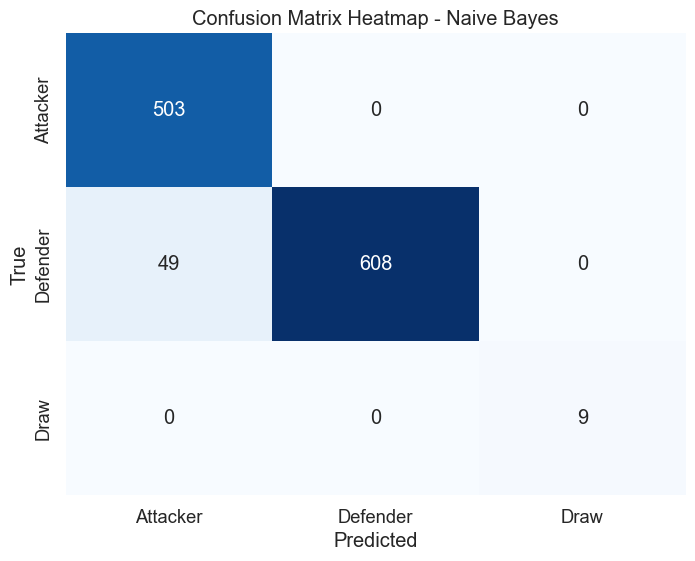

In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize Naive Bayes model
nb = GaussianNB()

# Train the Naive Bayes model
nb.fit(X_train, y_train)

# Make predictions on the test set
nb_pred = nb.predict(X_test)

# Calculate evaluation metrics for Naive Bayes
nb_accuracy = accuracy_score(y_test, nb_pred)  # Compare actual vs predicted labels
nb_report = classification_report(y_test, nb_pred, target_names=["Attacker", "Defender", "Draw"])  # Classification report with target names
nb_matrix = confusion_matrix(y_test, nb_pred)  # Confusion matrix

# Print the evaluation results
print('Accuracy of Naive Bayes : ', round(nb_accuracy, 3))
print('Classification report of Naive Bayes : \n', nb_report)
print('Confusion Matrix of Naive Bayes :\n', nb_matrix)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size for better readability
sns.heatmap(nb_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Attacker", "Defender", "Draw"], yticklabels=["Attacker", "Defender", "Draw"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix Heatmap - Naive Bayes")
plt.show()

Accuracy of Naive Bayes:  0.958
Classification report of Naive Bayes:
               precision    recall  f1-score   support

    Attacker       0.91      1.00      0.95       503
    Defender       1.00      0.93      0.96       657
        Draw       1.00      1.00      1.00         9

    accuracy                           0.96      1169
   macro avg       0.97      0.98      0.97      1169
weighted avg       0.96      0.96      0.96      1169

Confusion Matrix of Naive Bayes:
 [[503   0   0]
 [ 49 608   0]
 [  0   0   9]]


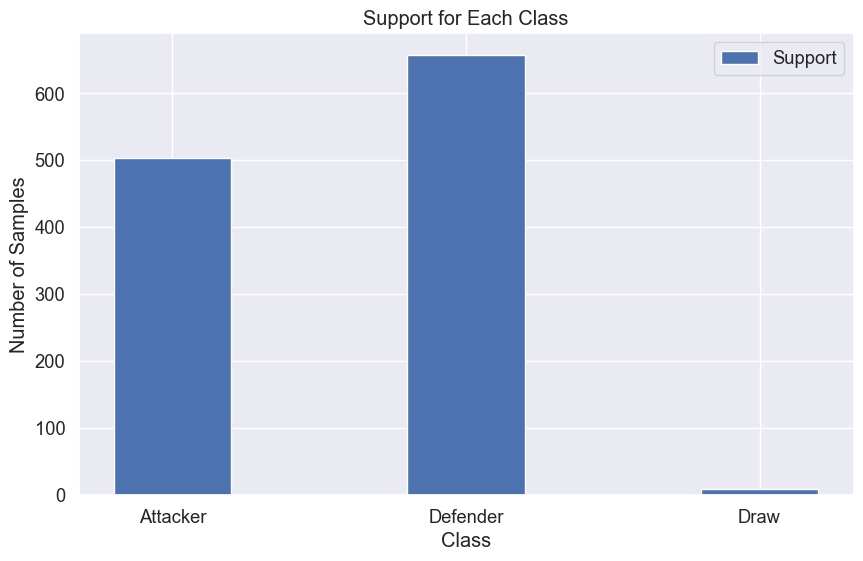

In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Assuming you already have nb_pred and y_test defined

# Calculate accuracy, classification report (as dictionary), and confusion matrix
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_report = classification_report(y_test, nb_pred, target_names=["Attacker", "Defender", "Draw"], output_dict=True)  # Get metrics as a dictionary
nb_matrix = confusion_matrix(y_test, nb_pred)

# Define the class labels explicitly
labels = ["Attacker", "Defender", "Draw"]

# Extract support for all classes from the classification report
support = [nb_report[label]['support'] if label in nb_report else 0 for label in labels]

# Print accuracy, classification report, and confusion matrix
print('Accuracy of Naive Bayes: ', round(nb_accuracy, 3))
print('Classification report of Naive Bayes:\n', classification_report(y_test, nb_pred, target_names=labels))
print('Confusion Matrix of Naive Bayes:\n', nb_matrix)

# Plot support for each class
plt.figure(figsize=(10, 6))
plt.bar(labels, support, width=0.4, label='Support', align='center')

plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks(labels)
plt.legend()
plt.title('Support for Each Class')
plt.show()

Accuracy of Naive Bayes:  0.958
Classification report of Naive Bayes:
               precision    recall  f1-score   support

    Attacker       0.91      1.00      0.95       503
    Defender       1.00      0.93      0.96       657
        Draw       1.00      1.00      1.00         9

    accuracy                           0.96      1169
   macro avg       0.97      0.98      0.97      1169
weighted avg       0.96      0.96      0.96      1169



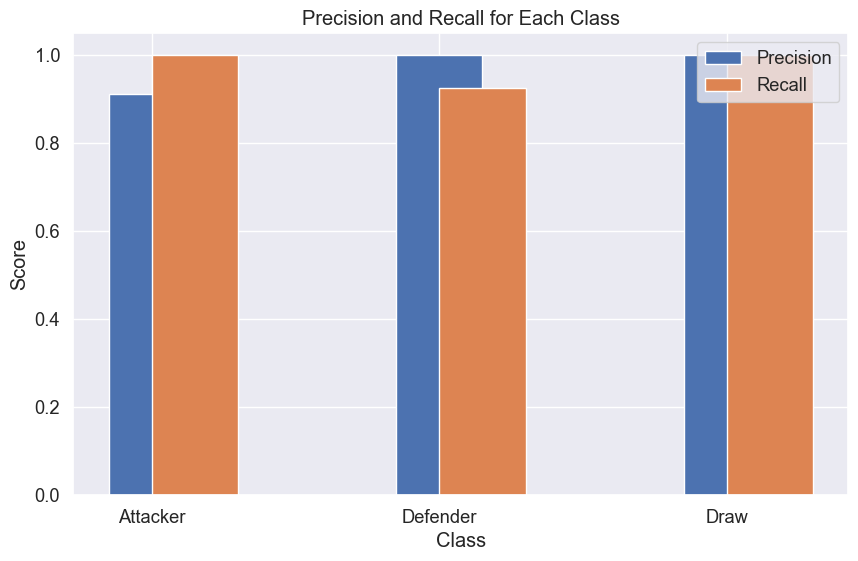

In [32]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Assuming you already have nb_pred and y_test defined

# Calculate accuracy, classification report (as dictionary), and confusion matrix
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_report = classification_report(y_test, nb_pred, target_names=["Attacker", "Defender", "Draw"], output_dict=True)  # Get metrics as a dictionary
nb_matrix = confusion_matrix(y_test, nb_pred)

# Define the class labels explicitly
labels = ["Attacker", "Defender", "Draw"]

# Extract precision and recall for all classes from the classification report
precision = [nb_report[label]['precision'] if label in nb_report else 0.0 for label in labels]
recall = [nb_report[label]['recall'] if label in nb_report else 0.0 for label in labels]

# Print accuracy and classification report
print('Accuracy of Naive Bayes: ', round(nb_accuracy, 3))
print('Classification report of Naive Bayes:\n', classification_report(y_test, nb_pred, target_names=labels))

# Plot precision and recall
plt.figure(figsize=(10, 6))
plt.bar(labels, precision, width=0.3, label='Precision', align='center')
plt.bar(labels, recall, width=0.3, label='Recall', align='edge')

plt.xlabel('Class')
plt.ylabel('Score')
plt.xticks(labels)
plt.legend()
plt.title('Precision and Recall for Each Class')
plt.show()


Accuracy of Ensemble Model :  1.0
Confusion Matrix of Ensemble Model : 
 [[503   0   0]
 [  0 657   0]
 [  0   0   9]]
Classification Report of Ensemble Model :
               precision    recall  f1-score   support

    Attacker       1.00      1.00      1.00       503
    Defender       1.00      1.00      1.00       657
        Draw       1.00      1.00      1.00         9

    accuracy                           1.00      1169
   macro avg       1.00      1.00      1.00      1169
weighted avg       1.00      1.00      1.00      1169



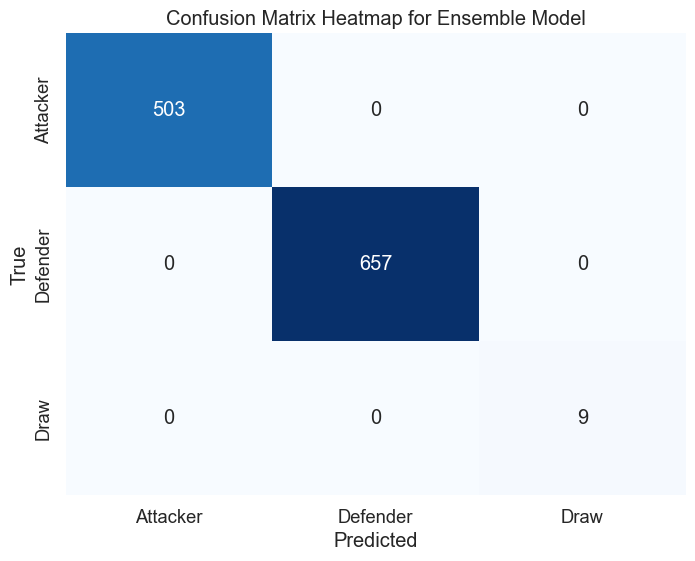

In [35]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the base estimators and the final estimator (Gaussian Naive Bayes)
estimators = [
    ('rf', RandomForestClassifier(n_estimators=1000, random_state=42)),
    ('svr', LinearSVC(random_state=42))
]

# Create the Stacking Classifier
clf = StackingClassifier(
    estimators=estimators, final_estimator=GaussianNB())

# Train the model
clf.fit(X_train, y_train)

# Make predictions
pred = clf.predict(X_test)

# Calculate the accuracy, confusion matrix, and classification report
eb_accuracy = accuracy_score(pred, y_test)
eb_matrix = confusion_matrix(y_test, pred)  # Use y_test as true labels and pred as predicted
eb_report = classification_report(y_test, pred, target_names=["Attacker", "Defender", "Draw"])

# Print the evaluation metrics
print('Accuracy of Ensemble Model : ', round(eb_accuracy, 3))
print('Confusion Matrix of Ensemble Model : \n', eb_matrix)
print('Classification Report of Ensemble Model :\n', eb_report)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size for better readability
sns.heatmap(eb_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Attacker", "Defender", "Draw"], yticklabels=["Attacker", "Defender", "Draw"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix Heatmap for Ensemble Model")
plt.show()


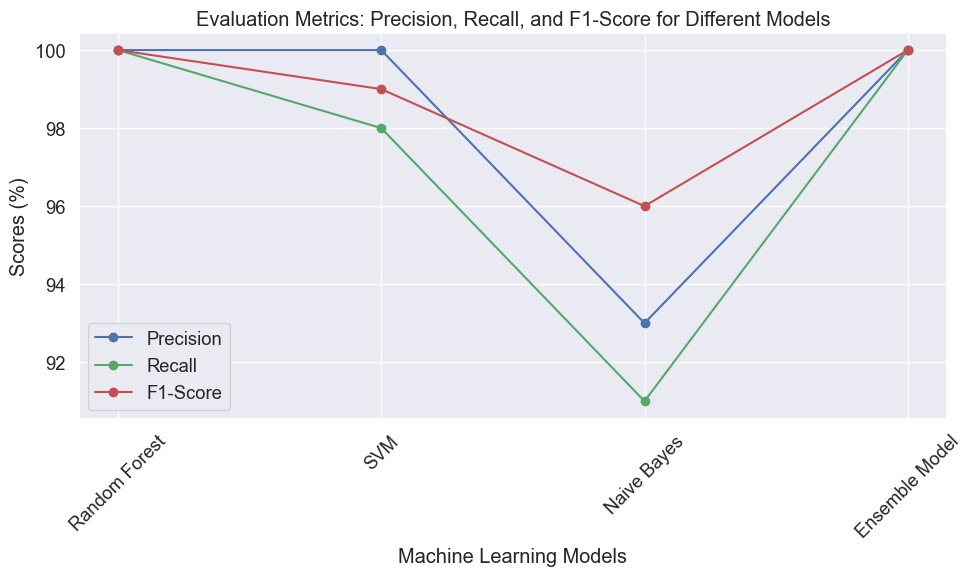

In [37]:
import matplotlib.pyplot as plt

# Model names
models = ['Random Forest', 'SVM', 'Naive Bayes', 'Ensemble Model']

# Precision, Recall, and F1-score values from your dataset
precision = [100, 100, 93, 100]
recall = [100, 98, 91, 100]
f1_score = [100, 99, 96, 100]

# X-axis values (models)
x = range(len(models))

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot precision scores
ax.plot(x, precision, marker='o', linestyle='-', color='b', label='Precision')

# Plot recall scores
ax.plot(x, recall, marker='o', linestyle='-', color='g', label='Recall')

# Plot F1-score scores
ax.plot(x, f1_score, marker='o', linestyle='-', color='r', label='F1-Score')

# Set x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45)
ax.set_xlabel('Machine Learning Models')

# Set y-axis label
ax.set_ylabel('Scores (%)')

# Set plot title
ax.set_title('Evaluation Metrics: Precision, Recall, and F1-Score for Different Models')

# Add a legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.grid(True)
plt.show()


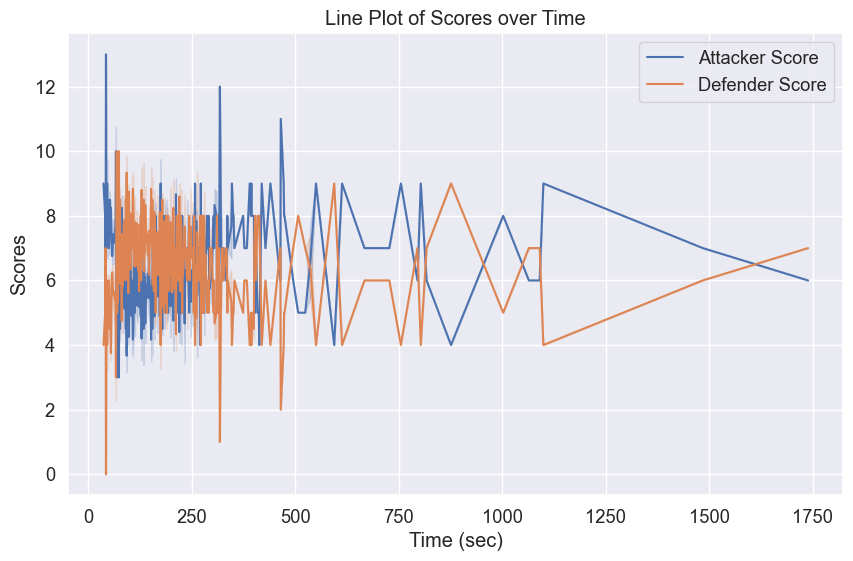

In [44]:
# Line plot of Attacker and Defender scores over Time
plt.figure(figsize=(10, 6))
sns.lineplot(data=df2, x='Time (sec)', y='Attacker Score', label='Attacker Score')
sns.lineplot(data=df2, x='Time (sec)', y='Defender Score', label='Defender Score')
plt.title('Line Plot of Scores over Time')
plt.xlabel('Time (sec)')
plt.ylabel('Scores')
plt.legend()
plt.show()



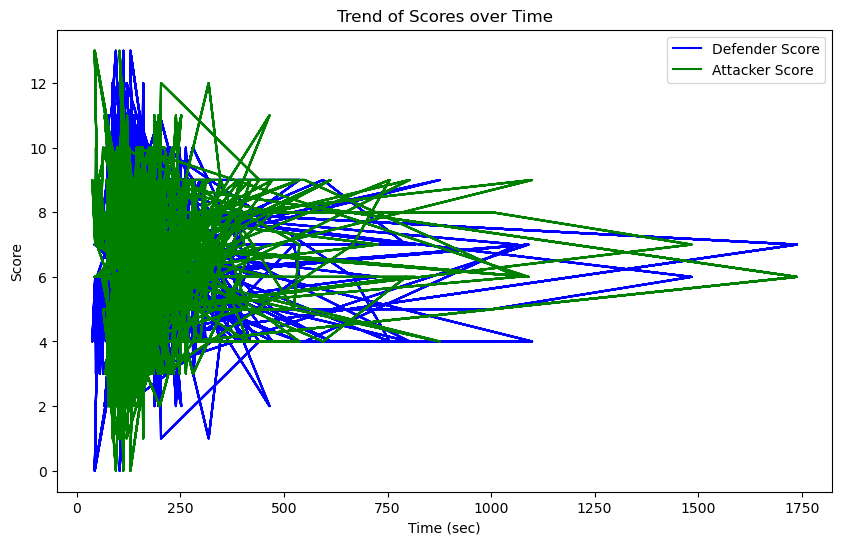

In [15]:
# Line plot to show trend of Defender and Attacker scores over time
plt.figure(figsize=(10, 6))

plt.plot(df2['Time (sec)'], df2['Defender Score'], label='Defender Score', color='blue')
plt.plot(df2['Time (sec)'], df2['Attacker Score'], label='Attacker Score', color='green')

plt.title('Trend of Scores over Time')
plt.xlabel('Time (sec)')
plt.ylabel('Score')
plt.legend()
plt.show()


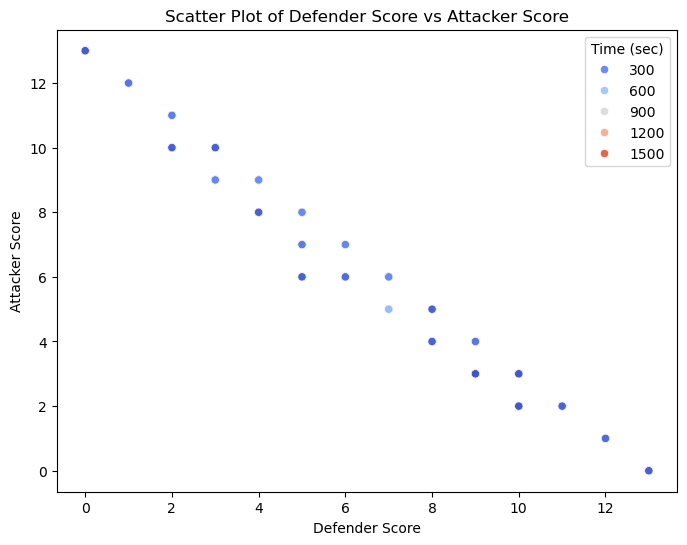

In [17]:
# Scatter plot to visualize the relationship between Defender Score and Attacker Score
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df2['Defender Score'], y=df2['Attacker Score'], hue=df2['Time (sec)'], palette='coolwarm')
plt.title('Scatter Plot of Defender Score vs Attacker Score')
plt.xlabel('Defender Score')
plt.ylabel('Attacker Score')
plt.show()


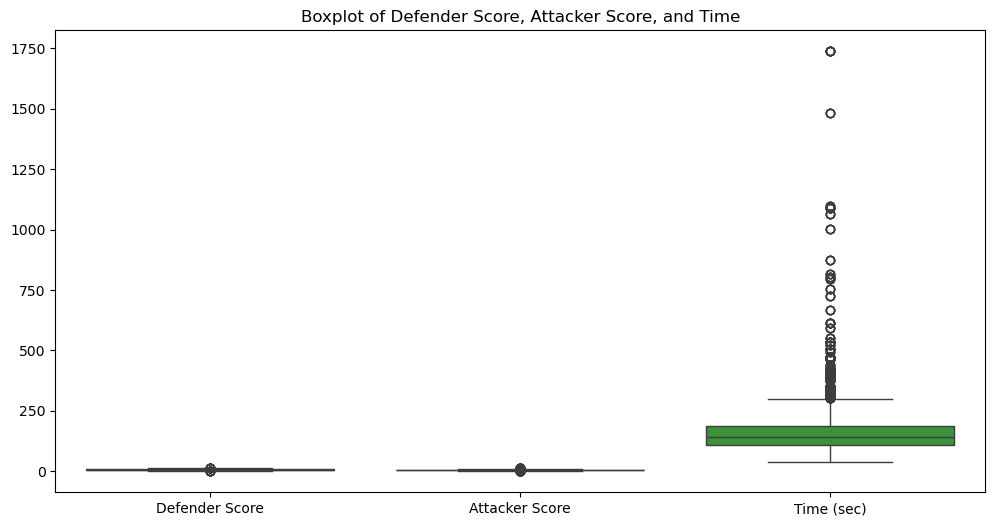

In [19]:
# Boxplot for each score to identify outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df2[['Defender Score', 'Attacker Score', 'Time (sec)']])
plt.title('Boxplot of Defender Score, Attacker Score, and Time')
plt.show()


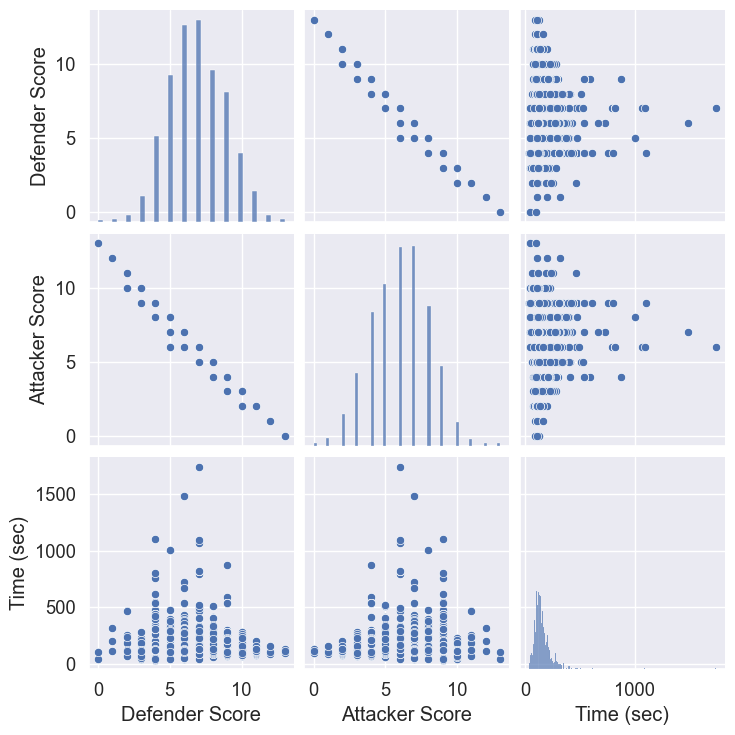

In [221]:
# Pairplot to visualize pairwise relationships in the dataset
sns.pairplot(df2[['Defender Score', 'Attacker Score', 'Time (sec)']])
plt.show()


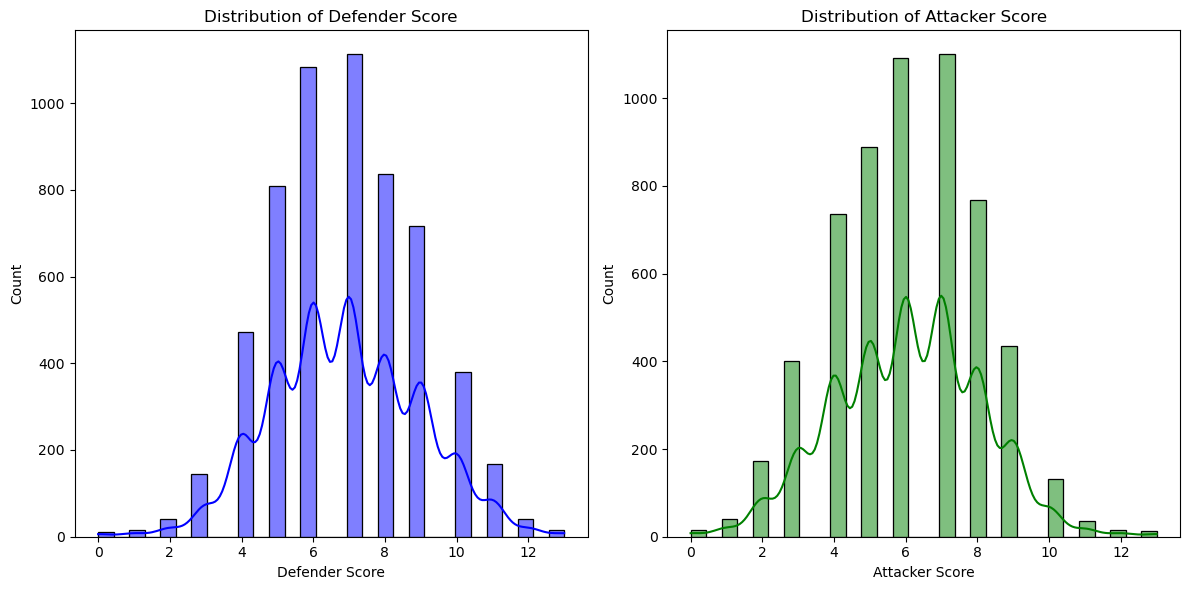

In [27]:
# Plot histograms for Defender and Attacker scores separately
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df2['Defender Score'], bins=30, color='blue', kde=True)
plt.title('Distribution of Defender Score')

plt.subplot(1, 2, 2)
sns.histplot(df2['Attacker Score'], bins=30, color='green', kde=True)
plt.title('Distribution of Attacker Score')

plt.tight_layout()
plt.show()


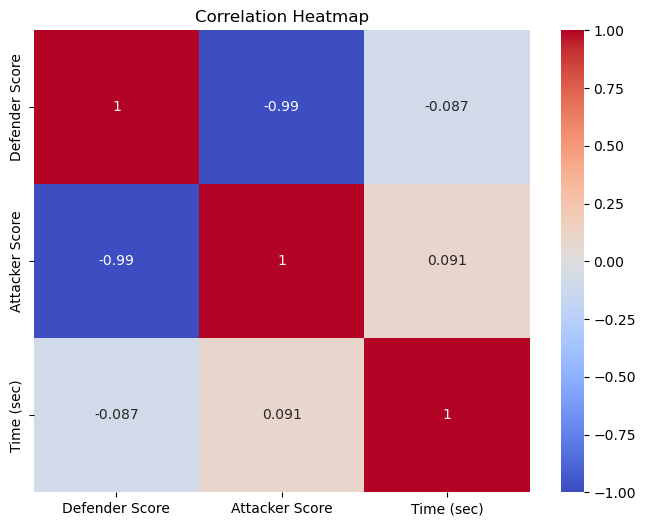

In [29]:
# Correlation matrix heatmap
plt.figure(figsize=(8, 6))
corr_matrix = df2[['Defender Score', 'Attacker Score', 'Time (sec)']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


Number of anomalies in Defender Score: 12
Number of anomalies in Attacker Score: 12


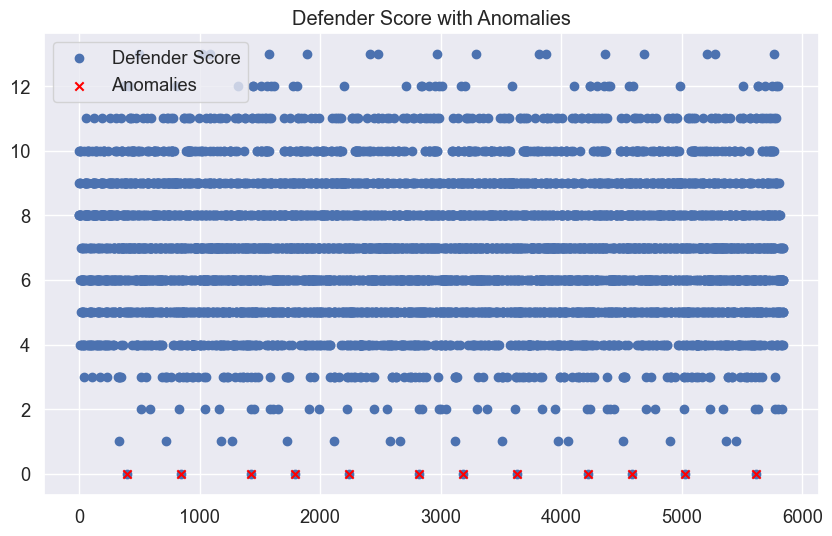

In [211]:
# Calculate the Z-scores for 'Defender Score' and 'Attacker Score'
df['Defender Z'] = np.abs(stats.zscore(df['Defender Score']))
df['Attacker Z'] = np.abs(stats.zscore(df['Attacker Score']))

# Set a threshold for anomaly detection (e.g., Z > 3)
anomalies_defender = df[df['Defender Z'] > 3]
anomalies_attacker = df[df['Attacker Z'] > 3]

print(f"Number of anomalies in Defender Score: {len(anomalies_defender)}")
print(f"Number of anomalies in Attacker Score: {len(anomalies_attacker)}")

# Plot the anomalies for 'Defender Score'
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['Defender Score'], label='Defender Score')
plt.scatter(anomalies_defender.index, anomalies_defender['Defender Score'], color='red', label='Anomalies', marker='x')
plt.title('Defender Score with Anomalies')
plt.legend()
plt.show()




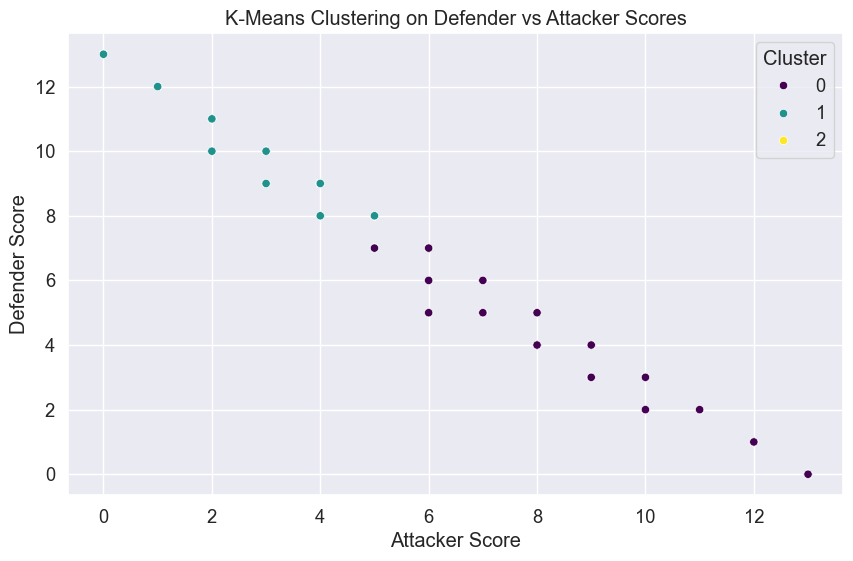

In [213]:
from sklearn.cluster import KMeans

# Prepare data for clustering by scaling numerical features
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df[['Defender Score', 'Attacker Score', 'Time (sec)']])

# Fit K-Means model
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_df)

# Visualize clusters in 2D space (Attacker vs Defender Score)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Attacker Score', y='Defender Score', hue='Cluster', data=df, palette='viridis')
plt.title('K-Means Clustering on Defender vs Attacker Scores')
plt.show()


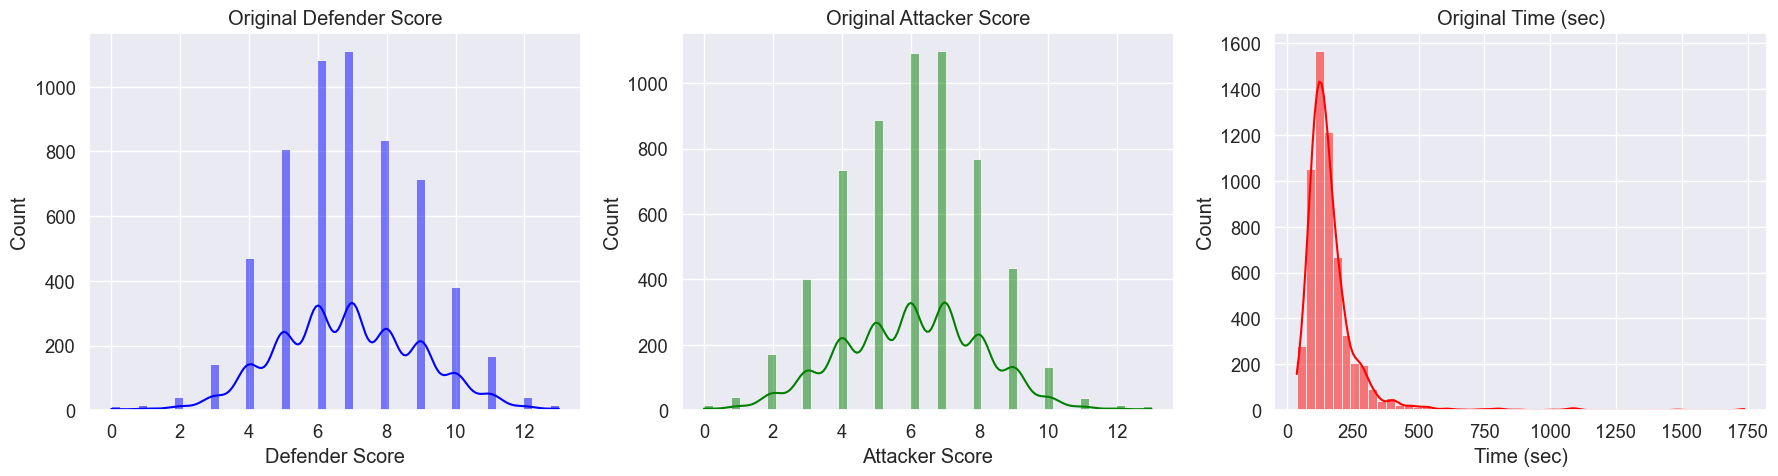

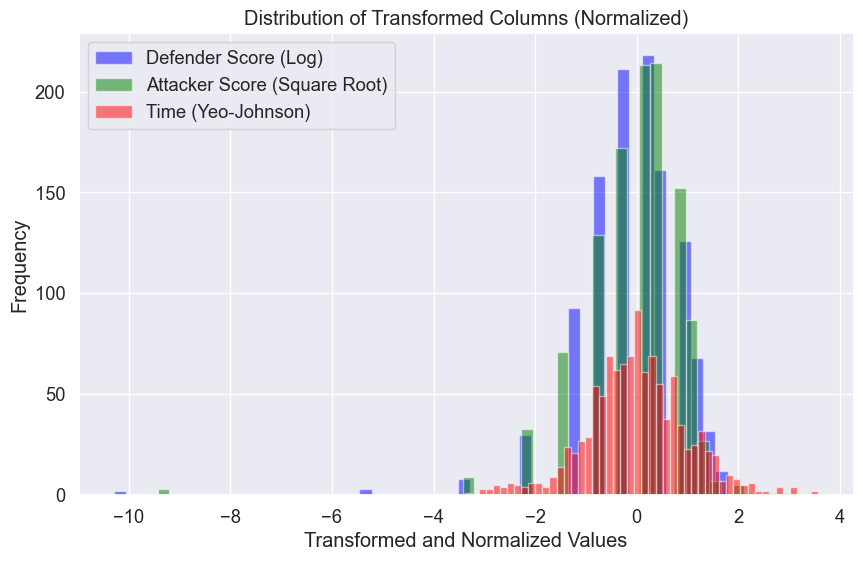

In [229]:
# --- Plot original histograms before transformation ---
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df2['Defender Score'], bins=50, color='blue', kde=True, ax=ax[0])
ax[0].set_title('Original Defender Score')

sns.histplot(df2['Attacker Score'], bins=50, color='green', kde=True, ax=ax[1])
ax[1].set_title('Original Attacker Score')

sns.histplot(df2['Time (sec)'], bins=50, color='red', kde=True, ax=ax[2])
ax[2].set_title('Original Time (sec)')

plt.tight_layout()
plt.show()

# Your existing transformations code here...

# --- Plot histograms after transformations (already in your code) ---
# Plot normalized histograms combined in one plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the normalized 'Defender Score' column
ax.hist(df2_normalized['Defender Score'], bins=50, alpha=0.5, color='blue', label='Defender Score (Log)')

# Plot the normalized 'Attacker Score' column
ax.hist(df2_normalized['Attacker Score'], bins=50, alpha=0.5, color='green', label='Attacker Score (Square Root)')

# Plot the normalized 'Time (sec)' column
ax.hist(df2_normalized['Time (sec)'], bins=50, alpha=0.5, color='red', label='Time (Yeo-Johnson)')

# Add labels and a legend
ax.set_xlabel('Transformed and Normalized Values')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Transformed Columns (Normalized)')
ax.legend()

# Show the plot
plt.show()

# --- Plot density plots after transformations ---
# Your density plot code continues as is...



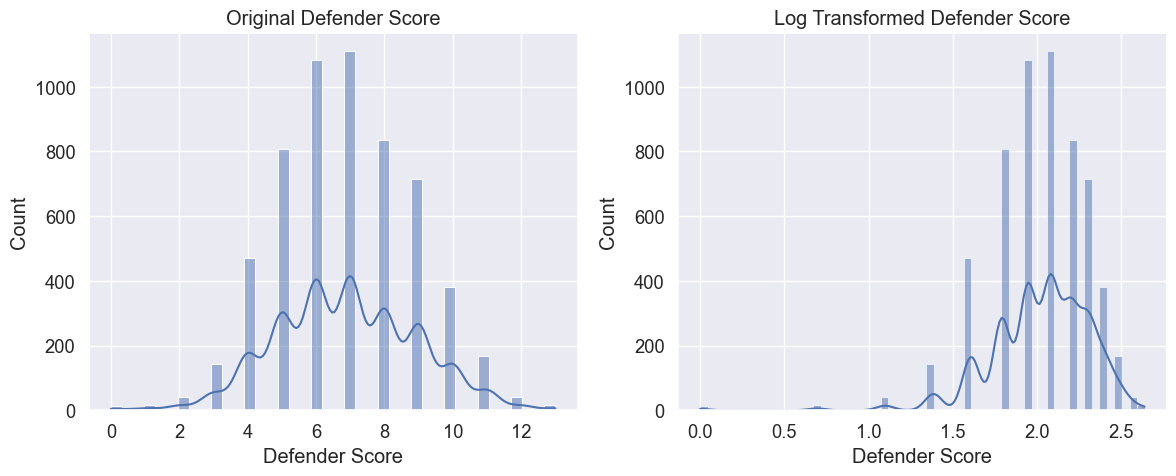

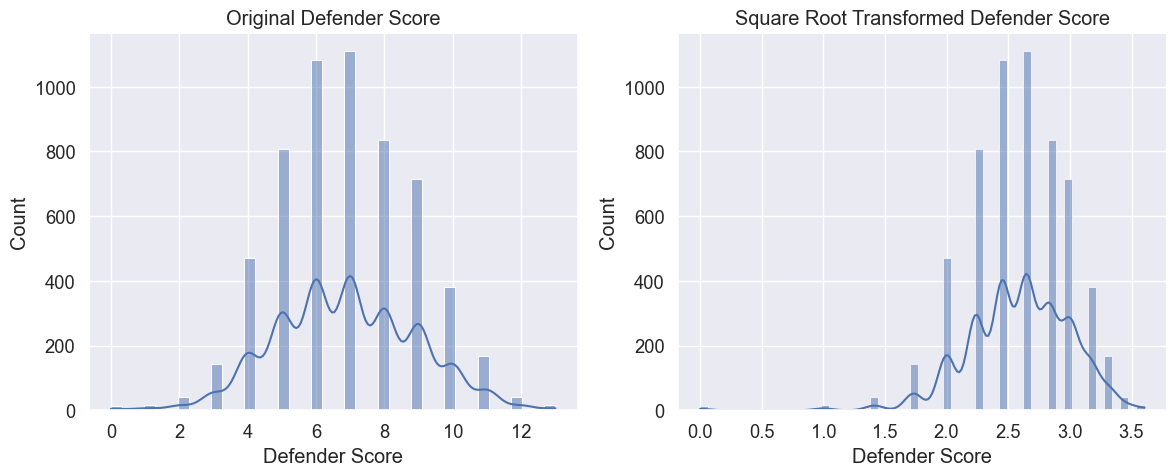

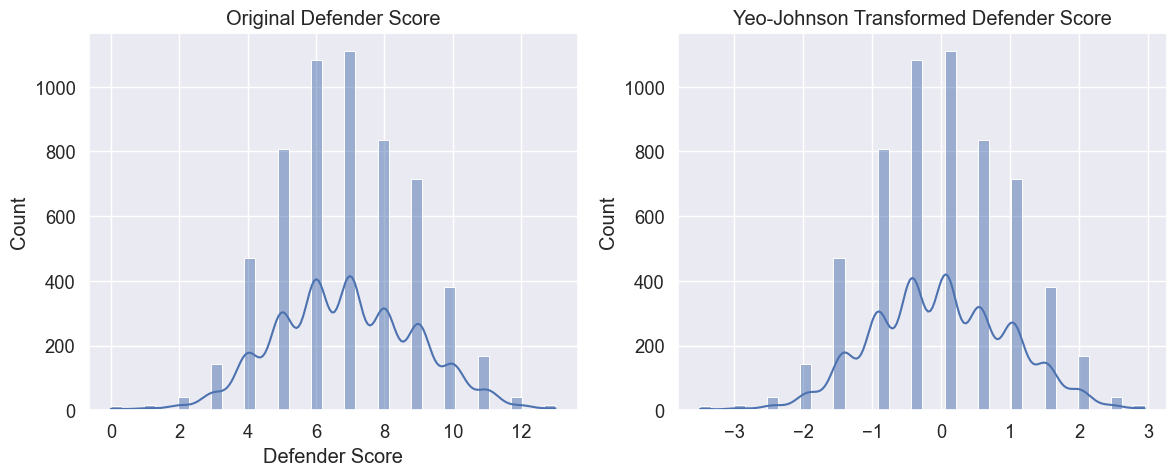

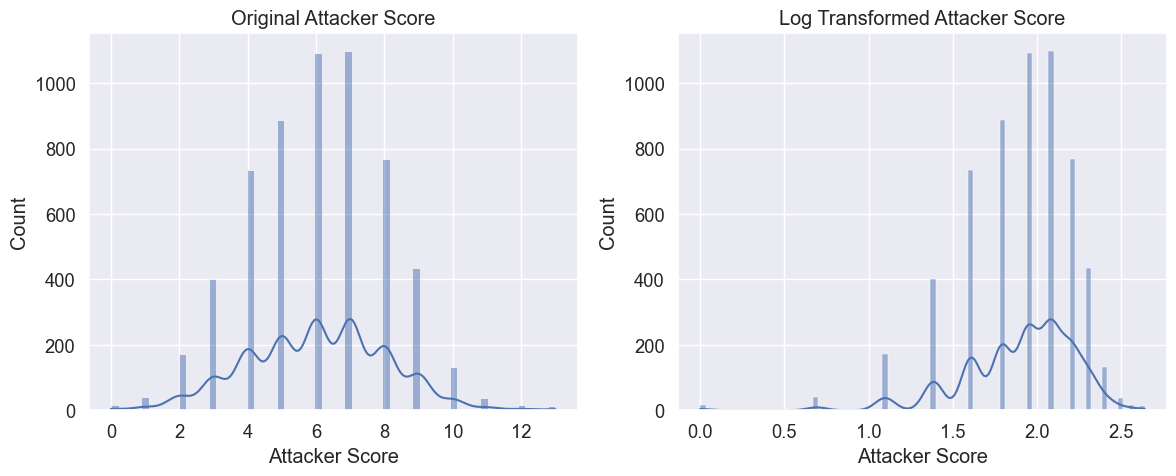

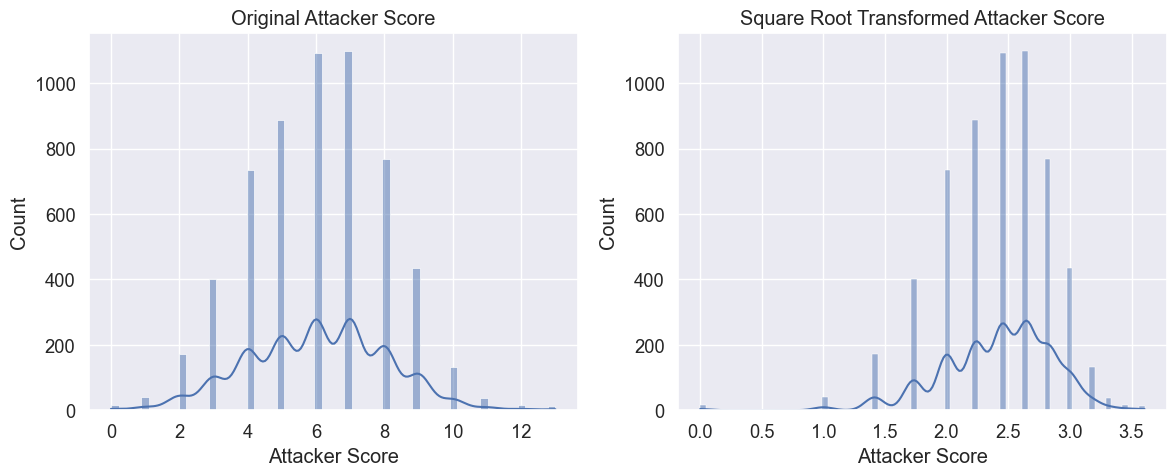

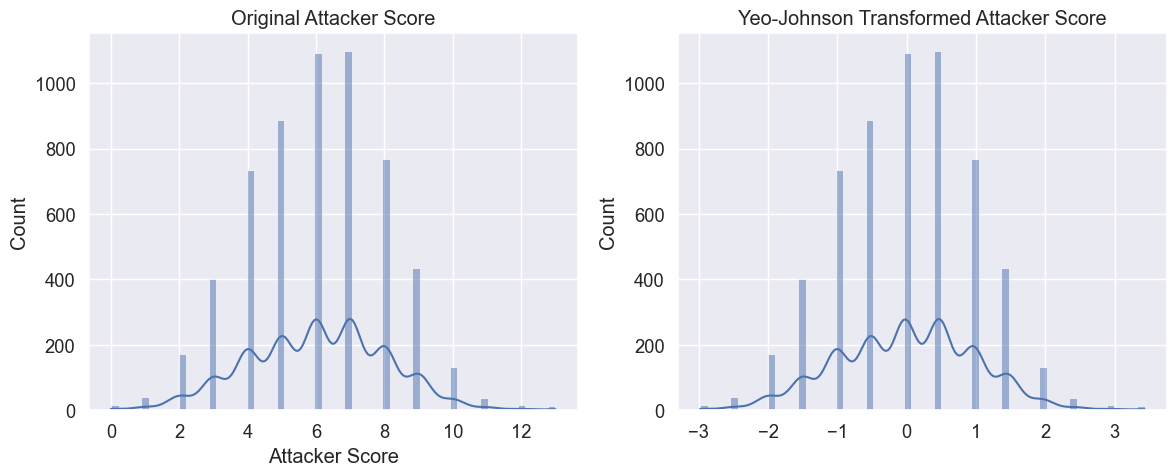

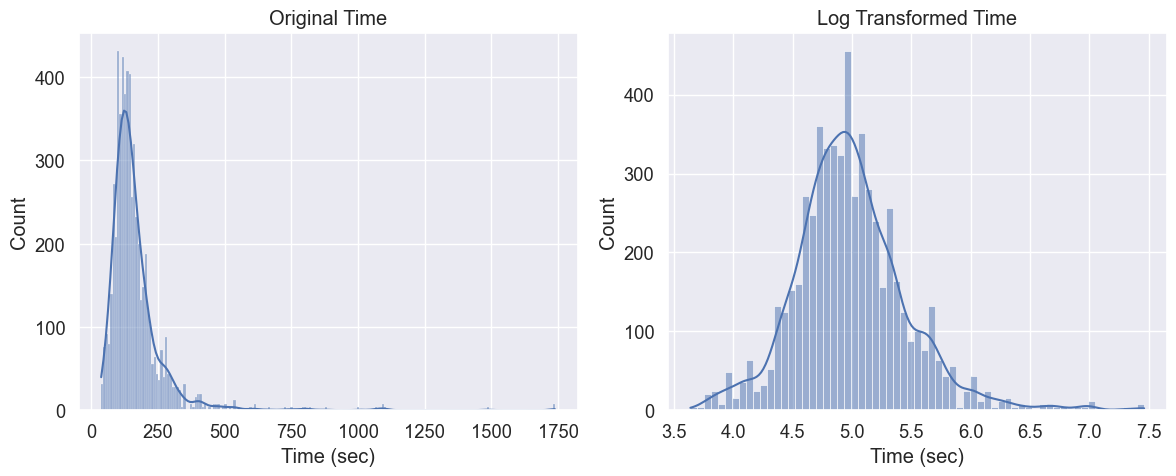

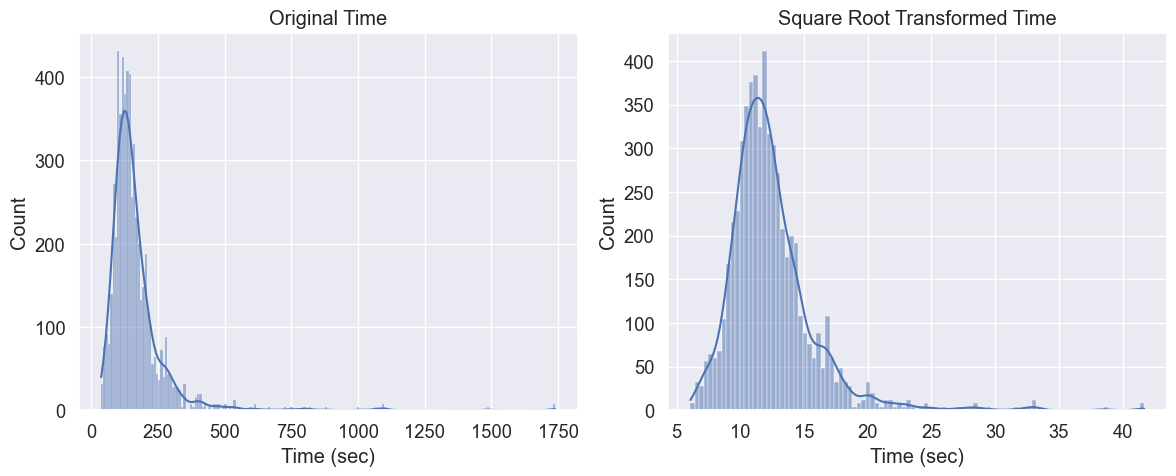

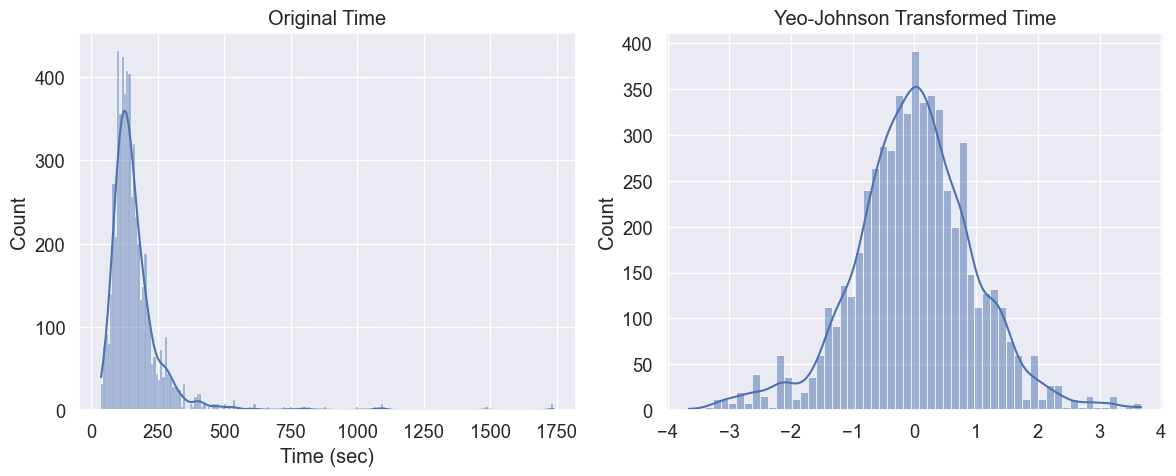

In [231]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer


# Corrected data (adjust the column names as needed)
defender_score = df['Defender Score']
attacker_score = df['Attacker Score']
time = df['Time (sec)']  # Use the correct column name here

# Plotting the skewness before transformation
def plot_before_after_transformation(original_data, transformed_data, title_before, title_after):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    sns.histplot(original_data, kde=True, ax=axes[0])
    axes[0].set_title(title_before)
    
    sns.histplot(transformed_data, kde=True, ax=axes[1])
    axes[1].set_title(title_after)
    
    plt.tight_layout()
    plt.show()

# Log Transformation
def log_transform(series):
    return np.log1p(series)  # log1p is log(1+x) to avoid log(0)

# Square Root Transformation
def sqrt_transform(series):
    return np.sqrt(series)

# Yeo-Johnson Transformation
def yeo_johnson_transform(series):
    transformer = PowerTransformer(method='yeo-johnson')
    return transformer.fit_transform(series.values.reshape(-1, 1)).flatten()

# Defender Score Transformations
log_defender_score = log_transform(defender_score)
sqrt_defender_score = sqrt_transform(defender_score)
yeo_johnson_defender_score = yeo_johnson_transform(defender_score)

# Attacker Score Transformations
log_attacker_score = log_transform(attacker_score)
sqrt_attacker_score = sqrt_transform(attacker_score)
yeo_johnson_attacker_score = yeo_johnson_transform(attacker_score)

# Time Transformations
log_time = log_transform(time)
sqrt_time = sqrt_transform(time)
yeo_johnson_time = yeo_johnson_transform(time)

# Plotting Before and After Transformations for each column
# Defender Score
plot_before_after_transformation(defender_score, log_defender_score, "Original Defender Score", "Log Transformed Defender Score")
plot_before_after_transformation(defender_score, sqrt_defender_score, "Original Defender Score", "Square Root Transformed Defender Score")
plot_before_after_transformation(defender_score, yeo_johnson_defender_score, "Original Defender Score", "Yeo-Johnson Transformed Defender Score")

# Attacker Score
plot_before_after_transformation(attacker_score, log_attacker_score, "Original Attacker Score", "Log Transformed Attacker Score")
plot_before_after_transformation(attacker_score, sqrt_attacker_score, "Original Attacker Score", "Square Root Transformed Attacker Score")
plot_before_after_transformation(attacker_score, yeo_johnson_attacker_score, "Original Attacker Score", "Yeo-Johnson Transformed Attacker Score")

# Time
plot_before_after_transformation(time, log_time, "Original Time", "Log Transformed Time")
plot_before_after_transformation(time, sqrt_time, "Original Time", "Square Root Transformed Time")
plot_before_after_transformation(time, yeo_johnson_time, "Original Time", "Yeo-Johnson Transformed Time")


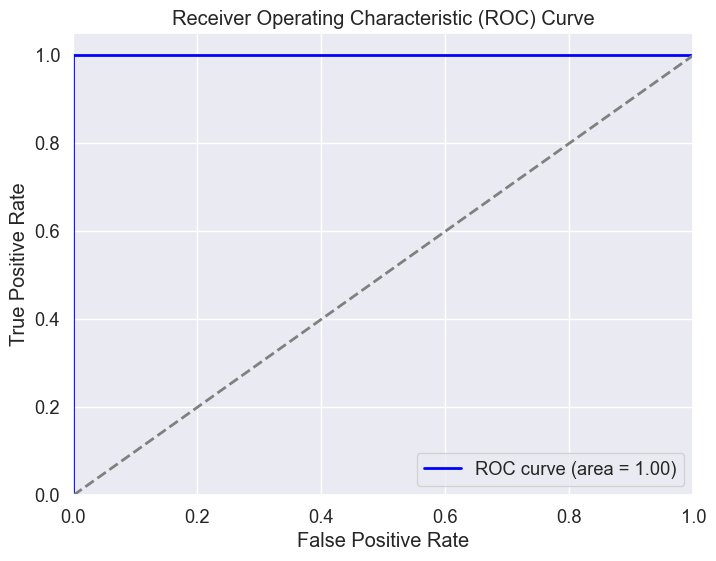

In [40]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming binary classification; replace with correct columns
# For binary classification, select probabilities for the positive class (e.g., "Defender")
y_true = y_test  # True binary labels
y_scores = rf.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_true, y_scores, pos_label=1)  # Adjust pos_label as needed
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



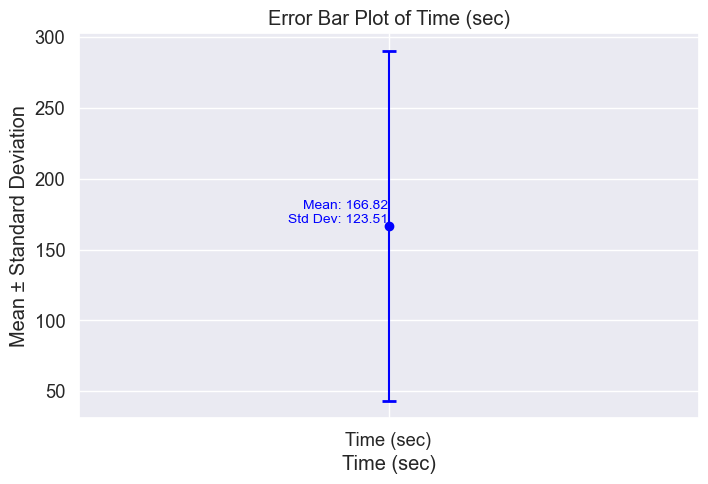

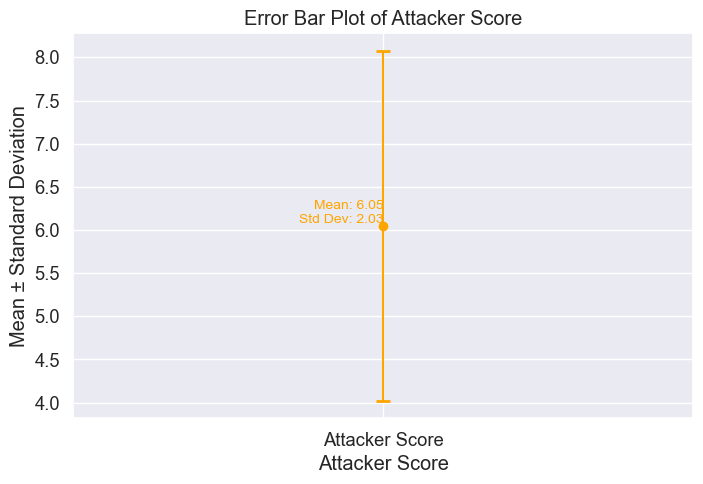

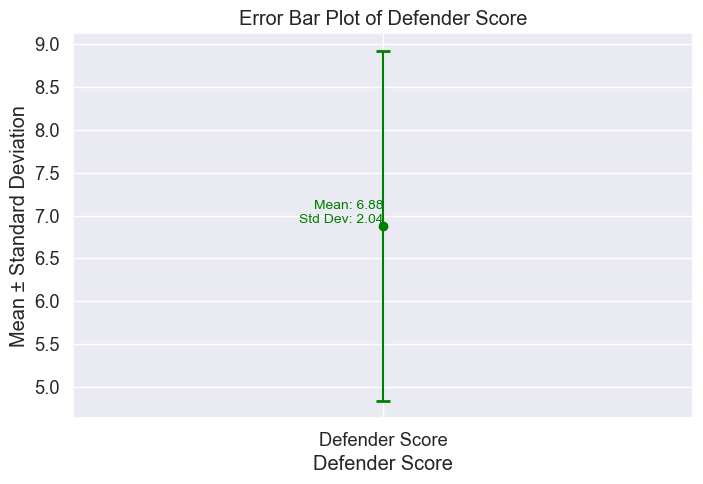

In [228]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a DataFrame `df2` with relevant columns

# Calculate mean and standard deviation for each feature
time_mean = df2['Time (sec)'].mean()
time_std = df2['Time (sec)'].std()

attacker_mean = df2['Attacker Score'].mean()
attacker_std = df2['Attacker Score'].std()

defender_mean = df2['Defender Score'].mean()
defender_std = df2['Defender Score'].std()

# Error Bar Plot for Time (sec)
plt.figure(figsize=(8, 5))
plt.errorbar(x=['Time (sec)'], y=[time_mean], yerr=[time_std], fmt='o', capsize=5, capthick=2, color='blue')
plt.title('Error Bar Plot of Time (sec)')
plt.xlabel('Time (sec)')
plt.ylabel('Mean ± Standard Deviation')
plt.grid(True)
plt.text(0, time_mean, f'Mean: {time_mean:.2f}\nStd Dev: {time_std:.2f}', ha='right', va='bottom', fontsize=10, color='blue')
plt.show()

# Error Bar Plot for Attacker Score
plt.figure(figsize=(8, 5))
plt.errorbar(x=['Attacker Score'], y=[attacker_mean], yerr=[attacker_std], fmt='o', capsize=5, capthick=2, color='orange')
plt.title('Error Bar Plot of Attacker Score')
plt.xlabel('Attacker Score')
plt.ylabel('Mean ± Standard Deviation')
plt.grid(True)
plt.text(0, attacker_mean, f'Mean: {attacker_mean:.2f}\nStd Dev: {attacker_std:.2f}', ha='right', va='bottom', fontsize=10, color='orange')
plt.show()

# Error Bar Plot for Defender Score
plt.figure(figsize=(8, 5))
plt.errorbar(x=['Defender Score'], y=[defender_mean], yerr=[defender_std], fmt='o', capsize=5, capthick=2, color='green')
plt.title('Error Bar Plot of Defender Score')
plt.xlabel('Defender Score')
plt.ylabel('Mean ± Standard Deviation')
plt.grid(True)
plt.text(0, defender_mean, f'Mean: {defender_mean:.2f}\nStd Dev: {defender_std:.2f}', ha='right', va='bottom', fontsize=10, color='green')
plt.show()



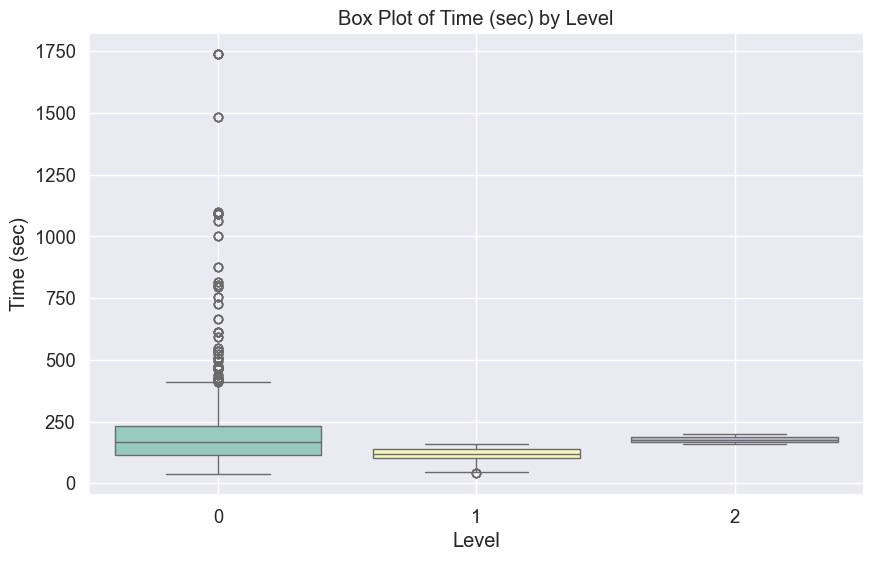

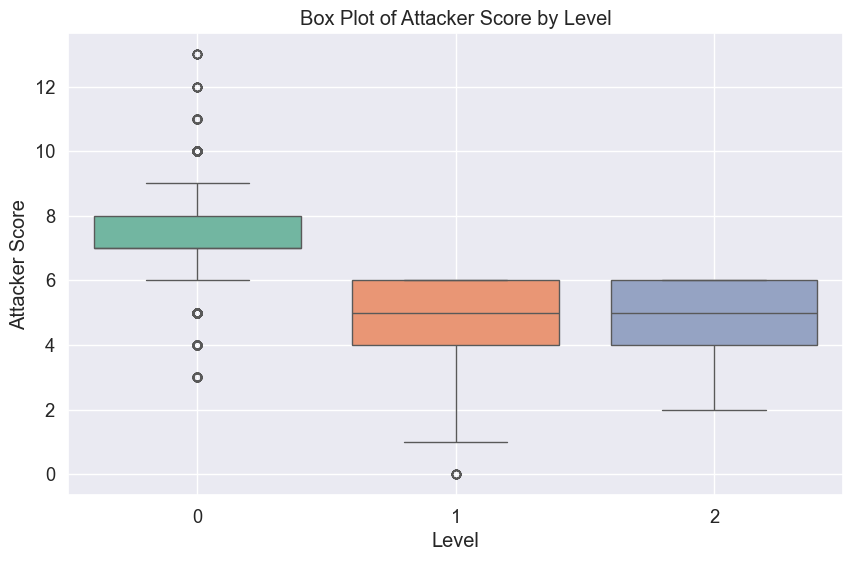

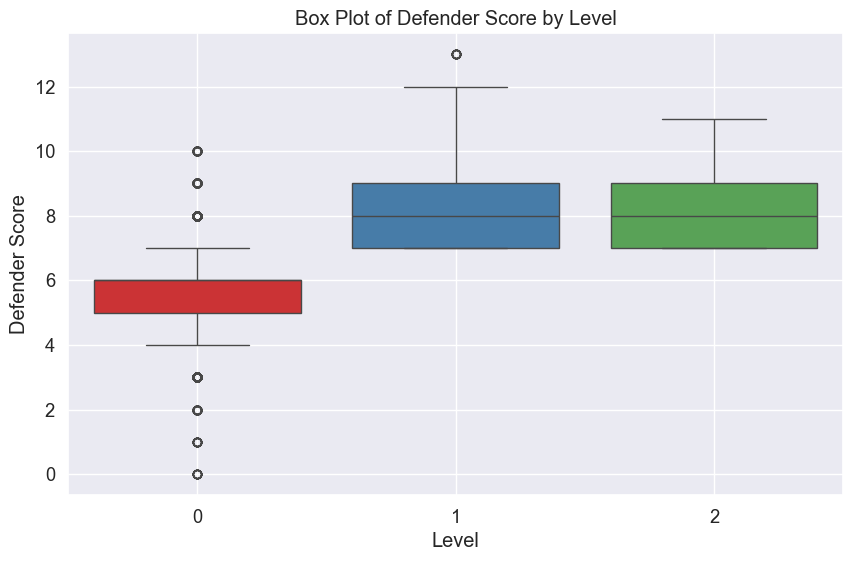

In [230]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box Plot for Time (sec)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df2, x='Level', y='Time (sec)', palette='Set3')
plt.title('Box Plot of Time (sec) by Level')
plt.xlabel('Level')
plt.ylabel('Time (sec)')
plt.grid(True)
plt.show()

# Box Plot for Attacker Score
plt.figure(figsize=(10, 6))
sns.boxplot(data=df2, x='Level', y='Attacker Score', palette='Set2')
plt.title('Box Plot of Attacker Score by Level')
plt.xlabel('Level')
plt.ylabel('Attacker Score')
plt.grid(True)
plt.show()

# Box Plot for Defender Score
plt.figure(figsize=(10, 6))
sns.boxplot(data=df2, x='Level', y='Defender Score', palette='Set1')
plt.title('Box Plot of Defender Score by Level')
plt.xlabel('Level')
plt.ylabel('Defender Score')
plt.grid(True)
plt.show()


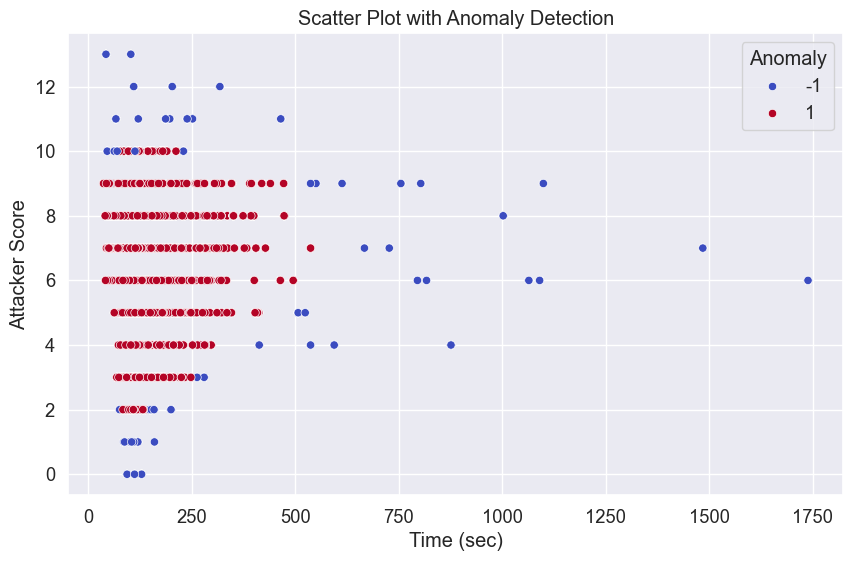

In [232]:
from sklearn.ensemble import IsolationForest

# Example: Detect anomalies based on Time (sec) and Scores
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df2['anomaly_score'] = iso_forest.fit_predict(df2[['Time (sec)', 'Attacker Score', 'Defender Score']])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df2, x='Time (sec)', y='Attacker Score', hue='anomaly_score', palette='coolwarm')
plt.title('Scatter Plot with Anomaly Detection')
plt.xlabel('Time (sec)')
plt.ylabel('Attacker Score')
plt.grid(True)
plt.legend(title='Anomaly')
plt.show()


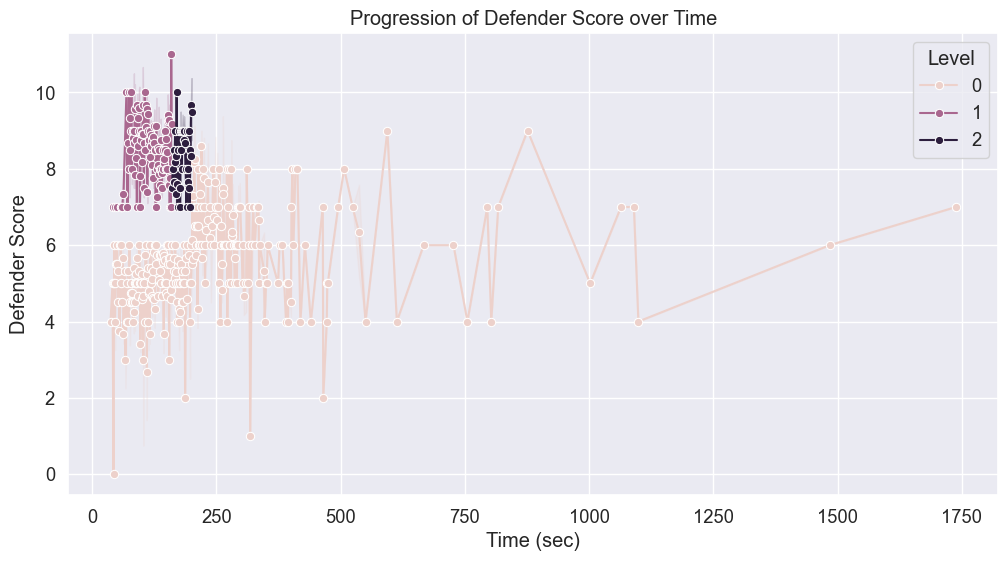

In [234]:
# Example: Progression of Defender Score over Time (sec)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df2, x='Time (sec)', y='Defender Score', hue='Level', marker='o')
plt.title('Progression of Defender Score over Time')
plt.xlabel('Time (sec)')
plt.ylabel('Defender Score')
plt.grid(True)
plt.show()


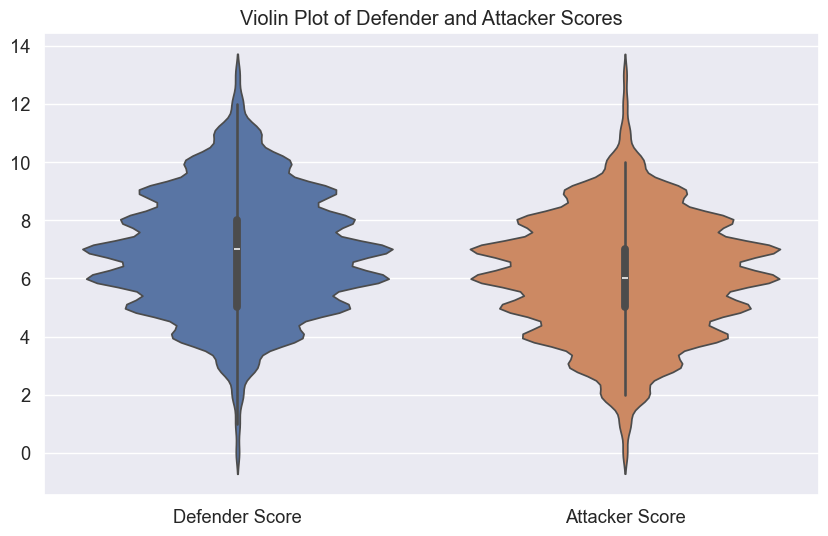

In [53]:
# Violin plot for Defender and Attacker scores
plt.figure(figsize=(10, 6))
sns.violinplot(data=df2[['Defender Score', 'Attacker Score']])
plt.title('Violin Plot of Defender and Attacker Scores')
plt.show()
